# 2. Images - Representation, grayscale and color, color spaces

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


def display_image(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

**a)** Create a grayscale image, having $100$ (lines) x $200$ (columns) pixels with
constant intensity, 100; draw the two diagonals of the image with intensity 255.
Display the image.

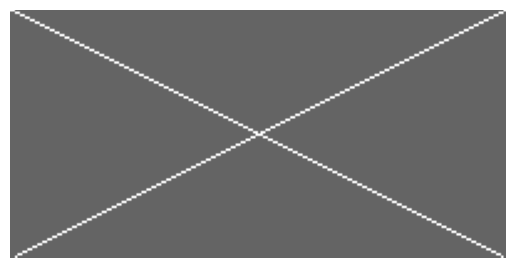

In [11]:
HEIGHT = 100
WIDTH = 200

matrix = np.ones((HEIGHT, WIDTH, 1), np.uint8)
matrix *= 100

cv2.line(matrix, (0, 0), (WIDTH, HEIGHT), (255, 255, 255), 1)
cv2.line(matrix, (WIDTH, 0), (0, HEIGHT), (255, 255, 255), 1)

display_image(matrix)

**b)** Create a color image, having $100$ (lines) x $200$ (columns) pixels with yellow color; draw
the two diagonals of the image, one in red color, the other in blue color. Display the image.

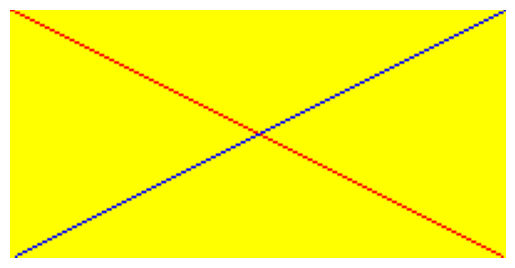

In [12]:
HEIGHT = 100
WIDTH = 200

image = np.zeros((HEIGHT, WIDTH, 3), np.uint8)

image[:] = (0, 255, 255)

cv2.line(image, (0, 0), (WIDTH, HEIGHT), (0, 0, 255), 1)
cv2.line(image, (WIDTH, 0), (0, HEIGHT), (255, 0, 0), 1)

display_image(image)

**c)** Read a color image, display it in one window, convert it to grayscale,
display the grayscale image in another window and save the grayscale image to a different
file.

Original


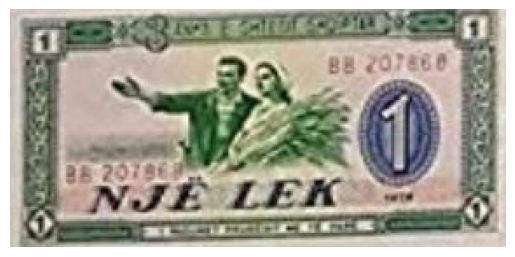

Grayscale


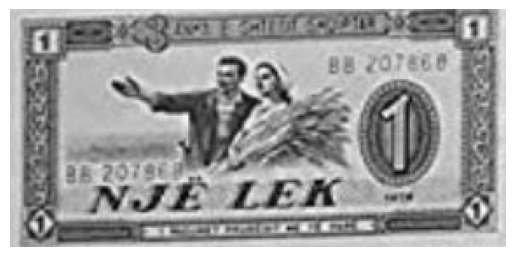

In [13]:
IMAGE_PATH = "../../images/bank_note.JPG"

file_name = IMAGE_PATH.rsplit("/", maxsplit=1)[-1]

image = cv2.imread(IMAGE_PATH)

grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imwrite("out/grayscale_" + file_name, grayscale)

print("Original")
display_image(image)

print("Grayscale")
display_image(grayscale)

**d)** Read an image (color or grayscale) and add "salt and pepper" noise to it.
The number of noisy points must be $10\%$ of the total number of image points.

*Suggestion: start by determining the number of image channel*

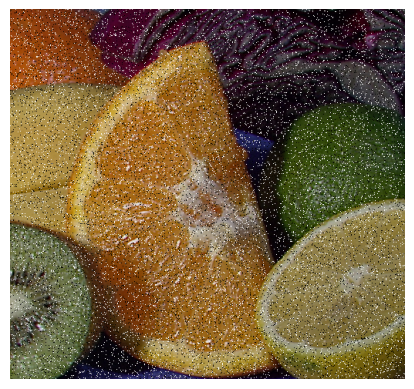

True

In [14]:
IMAGE_PATH = "../../images/fruits.jpg"

image = cv2.imread(IMAGE_PATH)

file_name = IMAGE_PATH.rsplit("/", maxsplit=1)[-1]

channels = image.shape[2]
PROBABILITY = 0.1

result = image.copy()

cv2.imshow("Image", image)

if len(image.shape) == 2:  # Grayscale image
    pepper = 0
    salt = 255
else:
    if channels == 3:  # RGB image
        pepper = np.array([0, 0, 0], dtype="uint8")
        salt = np.array([255, 255, 255], dtype="uint8")
    else:  # RGBA image
        pepper = np.array([0, 0, 0, 255], dtype="uint8")
        salt = np.array([255, 255, 255, 255], dtype="uint8")

probs = np.random.random(image.shape[:2])
result[probs < (PROBABILITY / 2)] = pepper
result[probs > 1 - (PROBABILITY / 2)] = salt

display_image(result)

cv2.imwrite("out/noisy_" + file_name, result)

**e)** Read a color image, in RGB format, split the 3 channels and show each channel in
a separate window. Add a constant value to one of the channels, merge the channels into
a new color image and show the resulting image

Blue


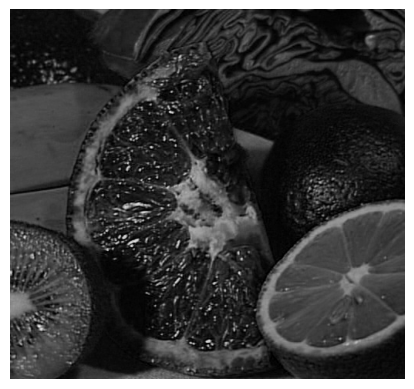

Green


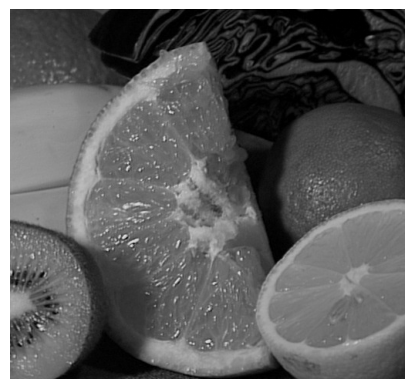

Red


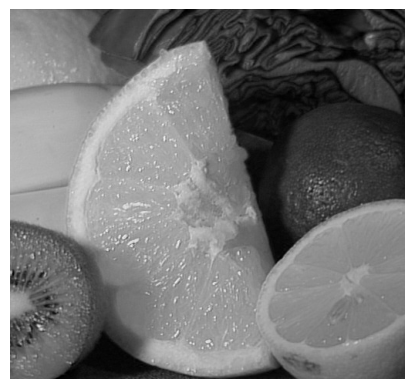

Blue, with constant value added


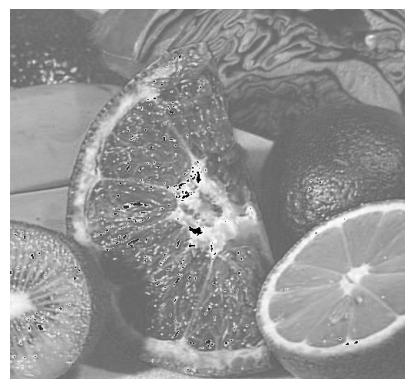

Merged channels


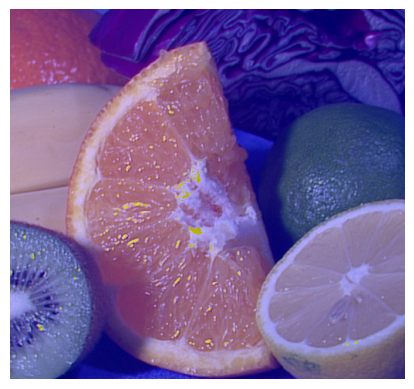

In [3]:
IMAGE_PATH = "../../images/fruits.jpg"

image = cv2.imread(IMAGE_PATH)

b_channel, g_channel, r_channel = cv2.split(image)

print("Blue")
display_image(b_channel)

print("Green")
display_image(g_channel)

print("Red")
display_image(r_channel)


b_channel += 100

print("Blue, with constant value added")
display_image(b_channel)

print("Merged channels")
merged_channels = cv2.merge([b_channel, g_channel, r_channel])

display_image(merged_channels)

**f)** Read a color image, in RGB format, convert it to HSV, split the 3 HSV channels and
show each channel in a separate window. Add a constant value to saturation channel,
merge the channels into a new color image and show the resulting image.

Hue


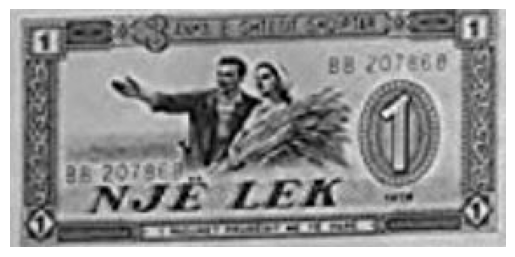

Saturation


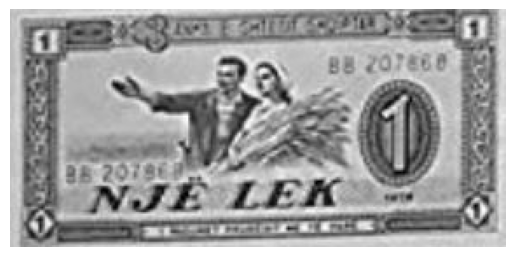

Value


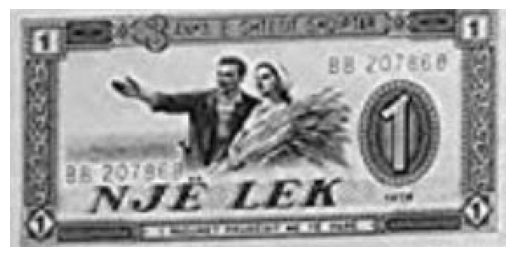

Saturation, with constant value added


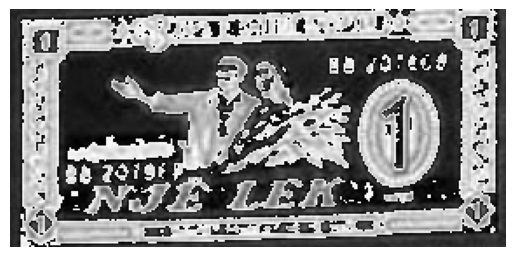

Merged channels


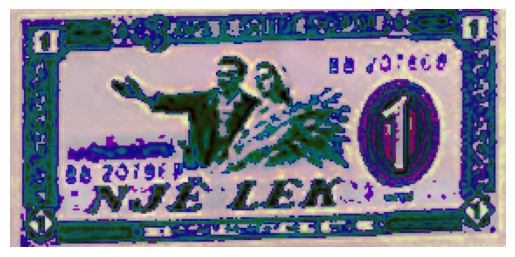

In [9]:
IMAGE_PATH = "../../images/bank_note.JPG"

image = cv2.imread(IMAGE_PATH)

cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(image)

print("Hue")
display_image(h)

print("Saturation")
display_image(s)

print("Value")
display_image(v)

s += 100
print("Saturation, with constant value added")
display_image(s)

merged_channels = cv2.cvtColor(cv2.merge([h, s, v]), cv2.COLOR_HSV2BGR)

print("Merged channels")
display_image(merged_channels)